<a href="https://colab.research.google.com/github/richapatel93/Machine-learning-/blob/main/svm_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Linear SVM Example – Classifying iris dataset

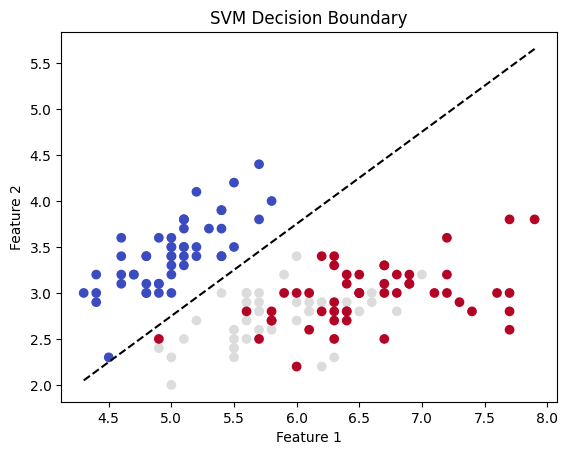

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Load a sample dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only two features for easy visualization
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Plot decision boundary
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
x_plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_plot = -(w[0] / w[1]) * x_plot - b / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.plot(x_plot, y_plot, 'k--')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()


# Linear SVM Example – Classifying Pass or Fail Based on Study Hours

Scenario:

If students who studied more than 5 hours passed and those who studied less than 5 hours failed, a straight line at 5 hours can separate the classes.

Linear SVM works here because we can separate the data with a straight line.

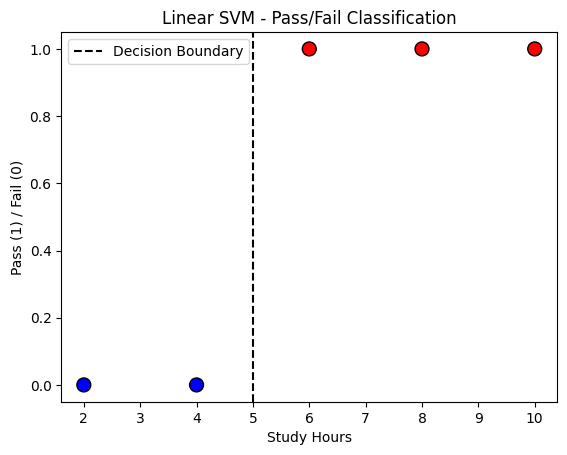

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Creating simple data (study hours, pass/fail)
X = np.array([[2], [4], [6], [8], [10]])  # Study hours
y = np.array([0, 0, 1, 1, 1])  # 0 = Fail, 1 = Pass

# Training an SVM with a linear kernel
model = SVC(kernel='linear')
model.fit(X, y)

# Plot decision boundary
plt.scatter(X, y, c=y, cmap='bwr', edgecolors='k', s=100)
plt.axvline(x=5, color='black', linestyle='--', label="Decision Boundary")
plt.xlabel("Study Hours")
plt.ylabel("Pass (1) / Fail (0)")
plt.legend()
plt.title("Linear SVM - Pass/Fail Classification")
plt.show()


# Nonlinear SVM Example – Classifying Pass or Fail Based on Study Hours & Sleep Quality

Now, some students study a lot but sleep poorly, while some study less but sleep well.

A straight line won’t work, so we use the RBF kernel to create a curved decision boundary.

1️⃣ Data now has two features → Study Hours & Sleep Quality (2D space).
2️⃣ SVM with RBF Kernel → SVC(kernel='rbf') adds extra dimensions to separate the data.
3️⃣ Curved Decision Boundary → The decision boundary is no longer a straight line but a curve that adjusts to the complex data.

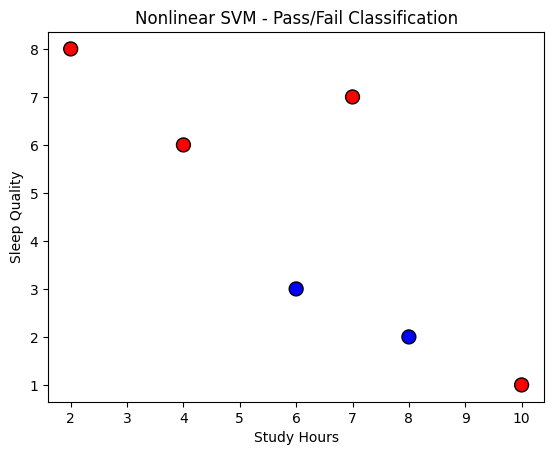

In [2]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Creating non-linear data (study hours, sleep quality) and labels
X = np.array([[2, 8], [4, 6], [6, 3], [8, 2], [10, 1], [7, 7]])  # [Study Hours, Sleep Quality]
y = np.array([1, 1, 0, 0, 1, 1])  # 1 = Pass, 0 = Fail

# Training an SVM with an RBF kernel
model = SVC(kernel='rbf', gamma='auto')
model.fit(X, y)

# Plotting the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=100)
plt.xlabel("Study Hours")
plt.ylabel("Sleep Quality")
plt.title("Nonlinear SVM - Pass/Fail Classification")
plt.show()


# Polynomial SVM :Classifying Exam Performance Based on Study Hours & Practice Tests

Students with moderate study hours & practice tests score well.

Too many or too few practice tests decrease the chance of passing.

The decision boundary needs to be curved (e.g., a parabola).







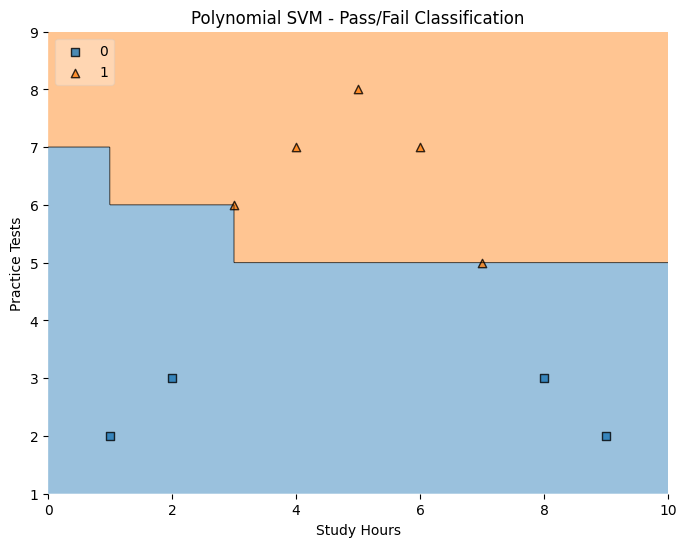

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Creating polynomial-like dataset
X = np.array([[1, 2], [2, 3], [3, 6], [4, 7], [5, 8], [6, 7], [7, 5], [8, 3], [9, 2]])  # Study Hours, Practice Tests
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])  # 0 = Fail, 1 = Pass

# Training an SVM with a polynomial kernel
model = SVC(kernel='poly', degree=3, gamma='auto')
model.fit(X, y)

# Plotting the decision boundary
plt.figure(figsize=(8,6))
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel("Study Hours")
plt.ylabel("Practice Tests")
plt.title("Polynomial SVM - Pass/Fail Classification")
plt.show()


In [1]:
# Install missing dependencies if needed
!pip install matplotlib scikit-learn

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets


Generate Linearly Separable Data

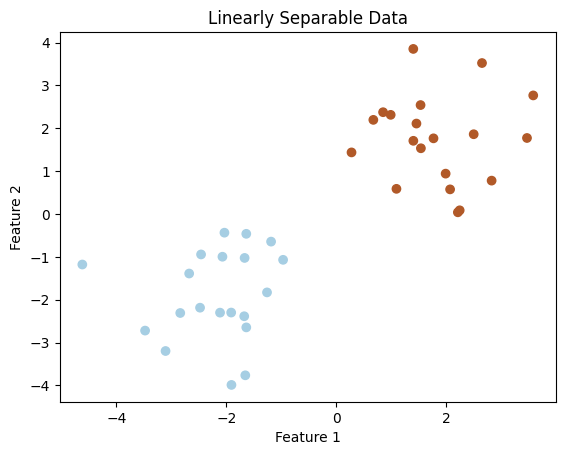

In [2]:
# Generate random 2D data (linearly separable)
np.random.seed(42)
X1 = np.random.randn(20, 2) + np.array([2, 2])  # Cluster 1
X2 = np.random.randn(20, 2) + np.array([-2, -2])  # Cluster 2

# Combine the datasets
X = np.vstack((X1, X2))
y = np.hstack((np.ones(20), np.zeros(20)))  # Labels: 1 for X1, 0 for X2

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data')
plt.show()


Train a Linear SVM and Plot Decision Boundary

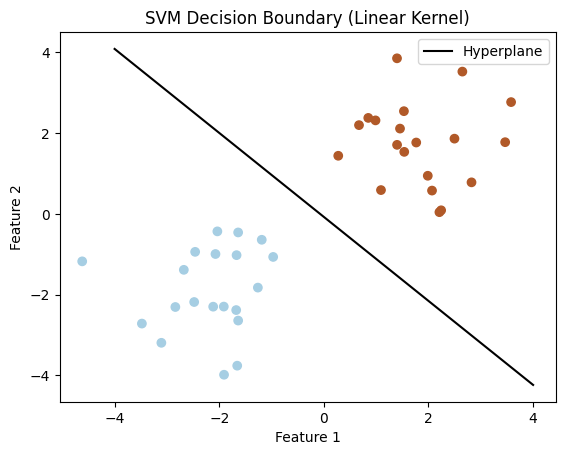

In [3]:
# Train an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X, y)

# Get hyperplane
w = svm_classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-4, 4)
yy = a * xx - (svm_classifier.intercept_[0]) / w[1]

# Plot hyperplane
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.plot(xx, yy, "k-", label="Hyperplane")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.legend()
plt.show()


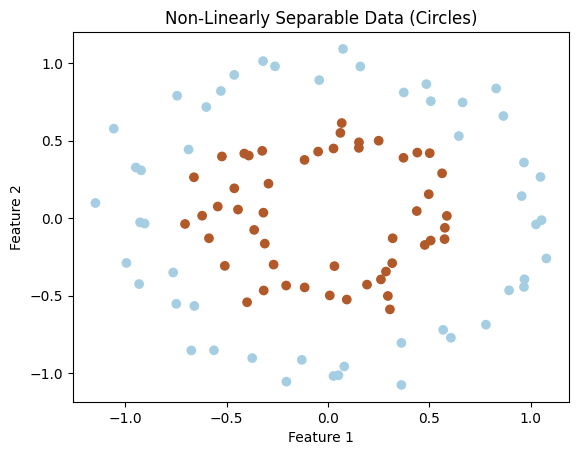

In [8]:
# Generate non-linearly separable 2D data (circle within a circle)
X, y = datasets.make_circles(n_samples=100, factor=0.5, noise=0.1)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Non-Linearly Separable Data (Circles)")
plt.show()


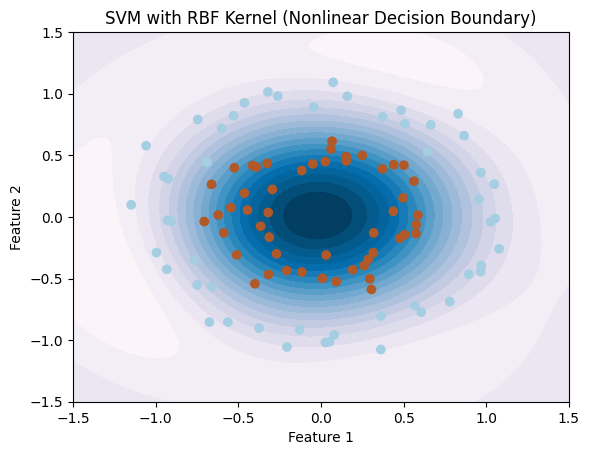

In [9]:
# Train SVM with RBF kernel
svm_classifier_rbf = SVC(kernel='rbf')
svm_classifier_rbf.fit(X, y)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
Z = svm_classifier_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap=plt.cm.PuBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM with RBF Kernel (Nonlinear Decision Boundary)")
plt.show()


Generate Non-Linearly Separable Data

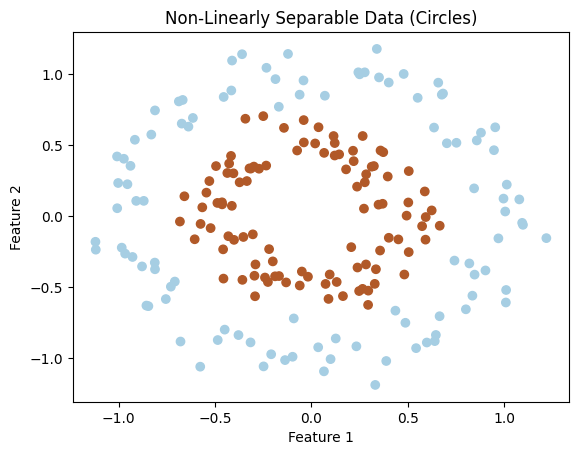

In [6]:
# Generate non-linearly separable 2D data (circle within a circle)
X, y = datasets.make_circles(n_samples=200, factor=0.5, noise=0.1)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Non-Linearly Separable Data (Circles)")
plt.show()


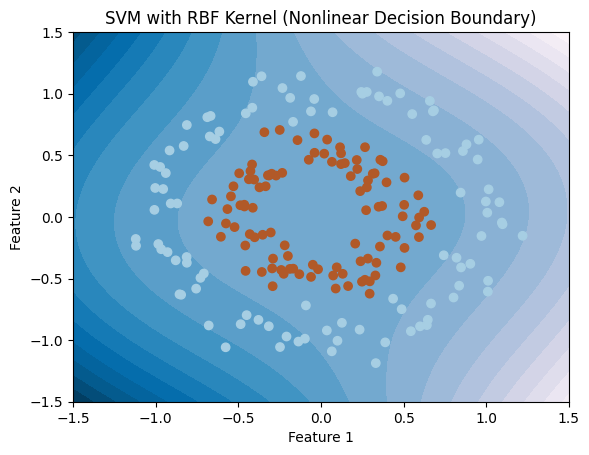

In [7]:
# Train SVM with RBF kernel
svm_classifier_rbf = SVC(kernel='poly')
svm_classifier_rbf.fit(X, y)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
Z = svm_classifier_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap=plt.cm.PuBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM with RBF Kernel (Nonlinear Decision Boundary)")
plt.show()
